In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas_datareader.data as pdr
import scipy.stats as stats

In [2]:
yf.pdr_override()

start = datetime.strptime('2017-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-04-01', '%Y-%m-%d')

apple = pdr.DataReader('AAPL', start, end , data_source='yahoo')['Adj Close']
tesla = pdr.DataReader('TSLA', start, end , data_source='yahoo')['Adj Close']
btc = pdr.DataReader('BTC-USD', start, end , data_source='yahoo')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


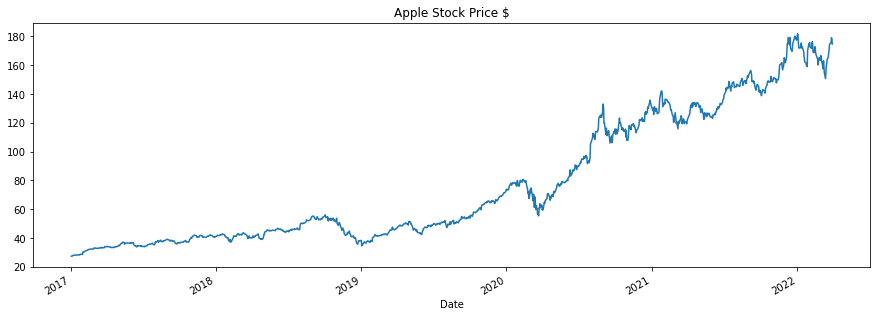

In [3]:
apple.plot(figsize=(15,5), title = "Apple Stock Price $")

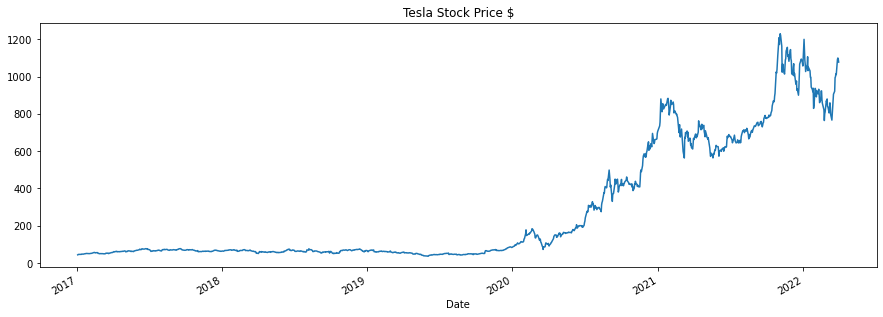

In [4]:
tesla.plot(figsize=(15,5), title = "Tesla Stock Price $")

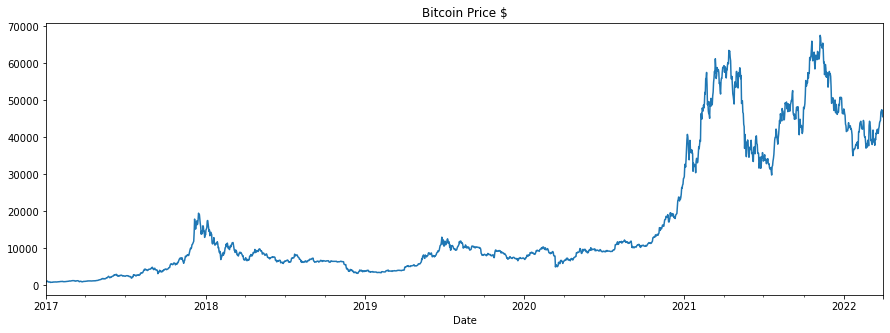

In [5]:
btc.plot(figsize=(15,5), title = "Bitcoin Price $")

In [6]:
data = pd.concat([apple, tesla, btc],axis=1).dropna()
data.columns = ["AAPL", "TSLA", "BTC-USD"]
N = len(data.columns)
data

,AAPL,TSLA,BTC-USD
Date,,,
2017-01-03,27.297695,43.397999,1043.839966
2017-01-04,27.267138,45.397999,1154.729980
2017-01-05,27.405804,45.349998,1013.380005
2017-01-06,27.711332,45.801998,902.200989
2017-01-09,27.965151,46.256001,902.828003
...,...,...,...
2022-03-25,174.720001,1010.640015,44348.730469
2022-03-28,175.600006,1091.839966,47128.003906
2022-03-29,178.960007,1099.569946,47465.730469


In [7]:
log_rets = np.log(data/data.shift(1)).dropna()
log_rets

,AAPL,TSLA,BTC-USD
Date,,,
2017-01-04,-0.001120,0.045055,0.100960
2017-01-05,0.005073,-0.001058,-0.130575
2017-01-06,0.011087,0.009918,-0.116209
2017-01-09,0.009118,0.009863,0.000695
2017-01-10,0.001008,-0.006115,0.005359
...,...,...,...
2022-03-25,0.003727,-0.003240,0.008783
2022-03-28,0.005024,0.077281,0.060783
2022-03-29,0.018954,0.007055,0.007141


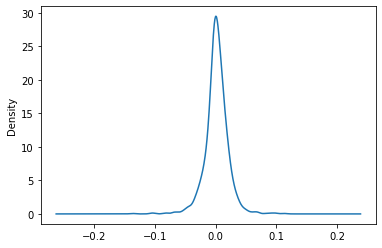

In [8]:
log_rets["AAPL"].plot(kind = "kde")

In [9]:
log_rets_cov = log_rets.cov()
log_rets_cov

,AAPL,TSLA,BTC-USD
AAPL,0.000368,0.000314,0.000155
TSLA,0.000314,0.001460,0.000230
BTC-USD,0.000155,0.000230,0.002434


In [10]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

$E[R_{p}] = w_{1}*E[R_{1}] + w_{2}*E[R_{2}] + w_{3}*E[R_{3}]$

In [11]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean() * weights) * 252 #Annualized Returns

$Cov = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix},
w = \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$Cov * w$

$ = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$

$ = \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$w^{T} * Cov * w$

$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$ = w_{1}^{2} * var(R_{1}) + w_{1} * w_{2} * cov(R_{1}, R_{2}) + w_{1} * w_{3} * cov(R_{1}, R_{3}) + \\
    w_{2} * w_{1} * cov(R_{2}, R_{1}) + w_{2}^{2} * var(R_{2}) + w_{2} * w_{3} * cov(R_{2}, R_{3}) + \\
    w_{3} * w_{1} * cov(R_{3}, R_{1}) + w_{3} * w_{2} * cov(R_{3}, R_{2}) + w_{3}^{2} * var(R_{3})$
    
$ = w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})$

$\sigma_{p} = \sqrt{w^{T} * Cov * w}$

$ = \sqrt{w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})}$

In [12]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [13]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    weights = gen_weights(N)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights, log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights, log_rets_cov))

In [14]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

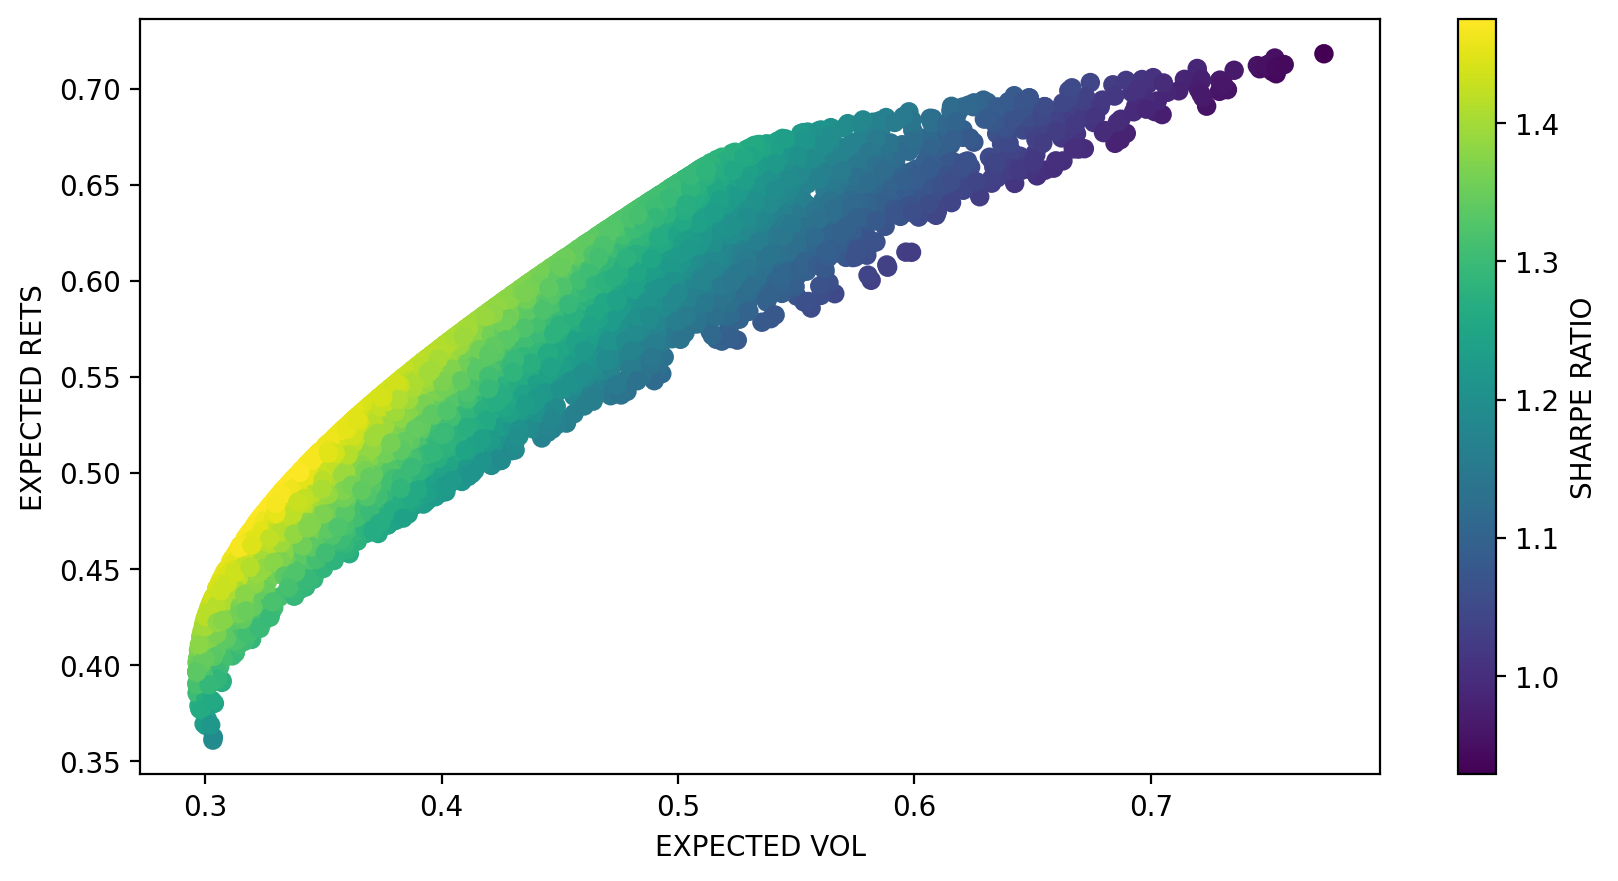

In [15]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTED RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [16]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.57795801, 0.21519148, 0.20685051])

In [17]:
from scipy.optimize import minimize

In [18]:
def function_to_minimize(weights):
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [19]:
equal_weights = N * [1/N]
bounds = tuple((0,1) for n in range(N))
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [20]:
minimize(fun = function_to_minimize, x0 = equal_weights, bounds = bounds, constraints = sum_constraint)

     fun: -1.4749030375447325
     jac: array([-0.00065356,  0.00098144,  0.00082879])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.58202614, 0.21370137, 0.20427249])

In [21]:
expected_returns_range = np.linspace(0.4,0.7,100)

In [22]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [23]:
# redefine calculate_volatility because scipy.optimize.minimize
# only takes one input (weights) for now 

def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [24]:
frontier_volatility = []
for possible_return in expected_returns_range:
    result = minimize(calculate_volatility, equal_weights, bounds = bounds, constraints = constraints)
    frontier_volatility.append(result['fun'])

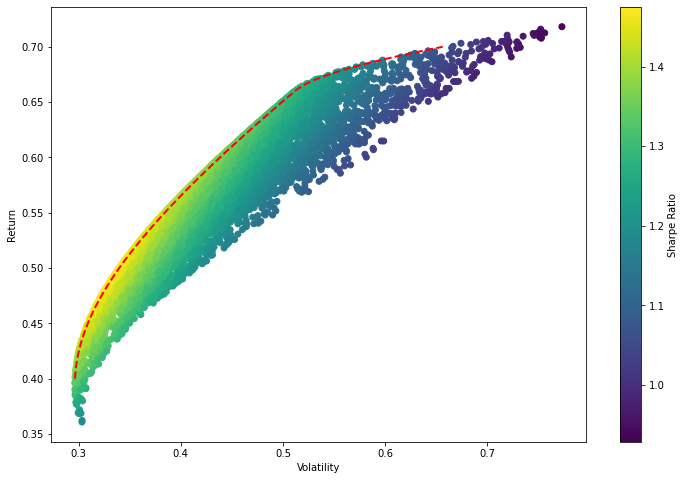

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)